The STIX flare list is available here: https://github.com/hayesla/stix_flarelist_science/tree/main

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_flarelist = "STIX_flarelist_w_locations_20210318_20240801_version1_python.csv"
stix_flarelist = pd.read_csv(csv_flarelist)

In [4]:
stix_flarelist

,start_UTC,end_UTC,peak_UTC,4-10 keV,10-15 keV,15-25 keV,25-50 keV,50-84 keV,att_in,bkg 4-10 keV,...,hgs_lat,hgc_lon,hgc_lat,solo_position_lat,solo_position_lon,solo_position_AU_distance,GOES_class_time_of_flare,GOES_flux_time_of_flare,flare_id,sidelobes_ratio
0,2021-03-18T14:51:39.337,2021-03-18T14:58:55.337,2021-03-18T14:53:07.337,5375,335,99,927,543,False,271.0,...,20.339668,244.371990,20.339668,1.601911,-110.598275,0.666330,A,3.488101e-08,2103181453,0.766586
1,2021-03-19T14:01:39.177,2021-03-19T14:21:03.183,2021-03-19T14:05:31.178,1215,99,91,927,543,False,271.0,...,20.822767,222.118021,20.822767,1.565540,-109.851528,0.672826,A,3.917223e-08,2103191405,0.754688
2,2021-03-19T18:34:35.205,2021-03-19T18:53:51.109,2021-03-19T18:42:43.108,2687,183,99,927,543,False,271.0,...,20.755609,222.854340,20.755609,1.558217,-109.706731,0.674117,A,4.179104e-08,2103191842,0.760059
3,2021-03-20T09:04:39.093,2021-03-20T09:12:19.094,2021-03-20T09:06:39.093,1087,123,91,927,543,False,271.0,...,20.222089,224.407464,20.222089,1.535231,-109.263524,0.678135,A,4.073035e-08,2103200906,0.770594
4,2021-03-20T12:03:31.111,2021-03-20T12:29:11.114,2021-03-20T12:14:59.112,1727,151,91,927,543,False,271.0,...,20.546974,221.863290,20.546974,1.530189,-109.168512,0.679010,A,5.101582e-08,2103201214,0.766514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17026,2024-07-23T04:17:05.163,2024-07-23T04:21:33.163,2024-07-23T04:17:57.163,1215,151,183,927,863,True,271.0,...,10.829408,302.226193,10.829408,0.896265,160.299080,0.918584,C3.7,3.689455e-06,2407230417,0.973358
17027,2024-07-25T17:02:36.761,2024-07-25T17:09:12.762,2024-07-25T17:05:44.762,1599,215,199,671,367,False,399.0,...,-8.197866,99.703555,-8.197866,0.619159,159.861269,0.909047,C2.2,2.187154e-06,2407251705,0.796693
17028,2024-07-27T04:11:52.991,2024-07-27T04:13:44.991,2024-07-27T04:12:48.991,1727,167,75,671,335,False,399.0,...,-8.273374,226.830971,-8.273374,0.455944,159.626699,0.903007,C4.2,4.173484e-06,2407270412,0.748029
17029,2024-07-27T04:26:36.993,2024-07-27T04:31:20.993,2024-07-27T04:30:20.993,1114111,409599,172031,86015,19455,False,399.0,...,-8.518926,225.868607,-8.518926,0.454576,159.624808,0.902955,C3.9,3.909921e-06,2407270430,0.740934


Select events seen from Earth

In [5]:
from datetime import datetime, date, time

In [6]:
Flares_seen_from_Earth = stix_flarelist[stix_flarelist["hpc_x_earth"].notnull()]

In [8]:
len(Flares_seen_from_Earth)

8291

Restrict to M-class and above

In [12]:
Big_flares = Flares_seen_from_Earth[Flares_seen_from_Earth["GOES_flux_time_of_flare"] > 4e-5]

In [14]:
len(Big_flares)

131

Finally, restrict to flares with longitude between 40 and 80 degrees

In [30]:
West_flares = Big_flares[Big_flares['hgs_lon'] > 20.]
Connected_flares = West_flares[West_flares['hgs_lon'] < 80.]

In [31]:
len(Connected_flares)

67

In [32]:
Connected_flares

,start_UTC,end_UTC,peak_UTC,4-10 keV,10-15 keV,15-25 keV,25-50 keV,50-84 keV,att_in,bkg 4-10 keV,...,hgs_lat,hgc_lon,hgc_lat,solo_position_lat,solo_position_lon,solo_position_AU_distance,GOES_class_time_of_flare,GOES_flux_time_of_flare,flare_id,sidelobes_ratio
671,2022-01-20T05:46:35.887,2022-01-20T07:03:27.895,2022-01-20T05:58:55.888,475135,47103,3711,1343,671,False,247.0,...,7.048843,321.852068,7.048843,-1.442594,-16.871577,0.924402,M5.5,0.000055,2201200558,0.756984
1262,2022-03-30T17:18:15.999,2022-03-30T18:46:12.008,2022-03-30T17:30:16.000,6478852,221183,59391,12799,1855,True,303.0,...,12.696869,84.920971,12.696869,1.630115,95.531530,0.335399,X1.4,0.000138,2203301730,0.792848
1263,2022-03-30T17:35:16.000,2022-03-30T17:38:16.001,2022-03-30T17:36:16.001,1900543,188415,17407,1087,495,True,303.0,...,12.366583,84.380614,12.366583,1.631903,95.552880,0.335424,X1.1,0.000108,2203301736,0.791447
1264,2022-03-30T17:39:16.001,2022-03-30T18:52:40.009,2022-03-30T18:37:36.007,1507327,139263,8703,991,495,True,303.0,...,33.801575,84.458388,33.801575,1.650151,95.770913,0.335674,M6.8,0.000068,2203301837,0.985188
1318,2022-03-31T18:15:48.158,2022-03-31T19:48:20.167,2022-03-31T18:26:44.159,4202464,311295,69631,17407,3455,True,303.0,...,11.551044,86.230420,11.551044,2.057228,100.737889,0.342106,M9.7,0.000097,2203311826,0.815065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15122,2024-05-08T22:18:09.680,2024-05-08T22:36:09.682,2024-05-08T22:29:41.681,6399,399,75,735,367,False,367.0,...,25.500861,41.136669,25.500861,7.581476,166.949620,0.679514,M9.9,0.000099,2405082229,0.792135
15147,2024-05-09T08:31:37.747,2024-05-09T08:50:25.749,2024-05-09T08:33:57.747,59391,7935,991,735,367,False,303.0,...,26.487084,35.635971,26.487084,7.554595,167.145835,0.683881,M5.4,0.000054,2405090833,0.786103
15149,2024-05-09T09:27:49.753,2024-05-09T09:37:33.754,2024-05-09T09:29:49.753,2943,367,107,735,367,False,303.0,...,25.306122,35.333713,25.306122,7.552086,167.163592,0.684282,X1.4,0.000141,2405090929,0.791779
16190,2024-06-03T14:01:36.608,2024-06-03T14:22:16.610,2024-06-03T14:07:48.608,2687,271,83,735,367,False,231.0,...,33.518216,64.873088,33.518216,5.542890,170.091013,0.878638,M4.8,0.000048,2406031407,0.774987


In [35]:
#Connected_flares.to_csv('stix_flares_seenfromearth_aboveM_connected.csv')

Plot

In [36]:
import matplotlib.pyplot as plt
from matplotlib import dates

In [37]:
ticks = dates.date2num(pd.to_datetime(Connected_flares["peak_UTC"]))

In [38]:
sizes = Connected_flares["GOES_flux_time_of_flare"].values*4e6/10

[Text(1, 19012.24925796296, '2022-01-20'),
 Text(1, 19554.73930707176, '2023-07-16'),
 Text(1, 19897.551398483796, '2024-06-23')]

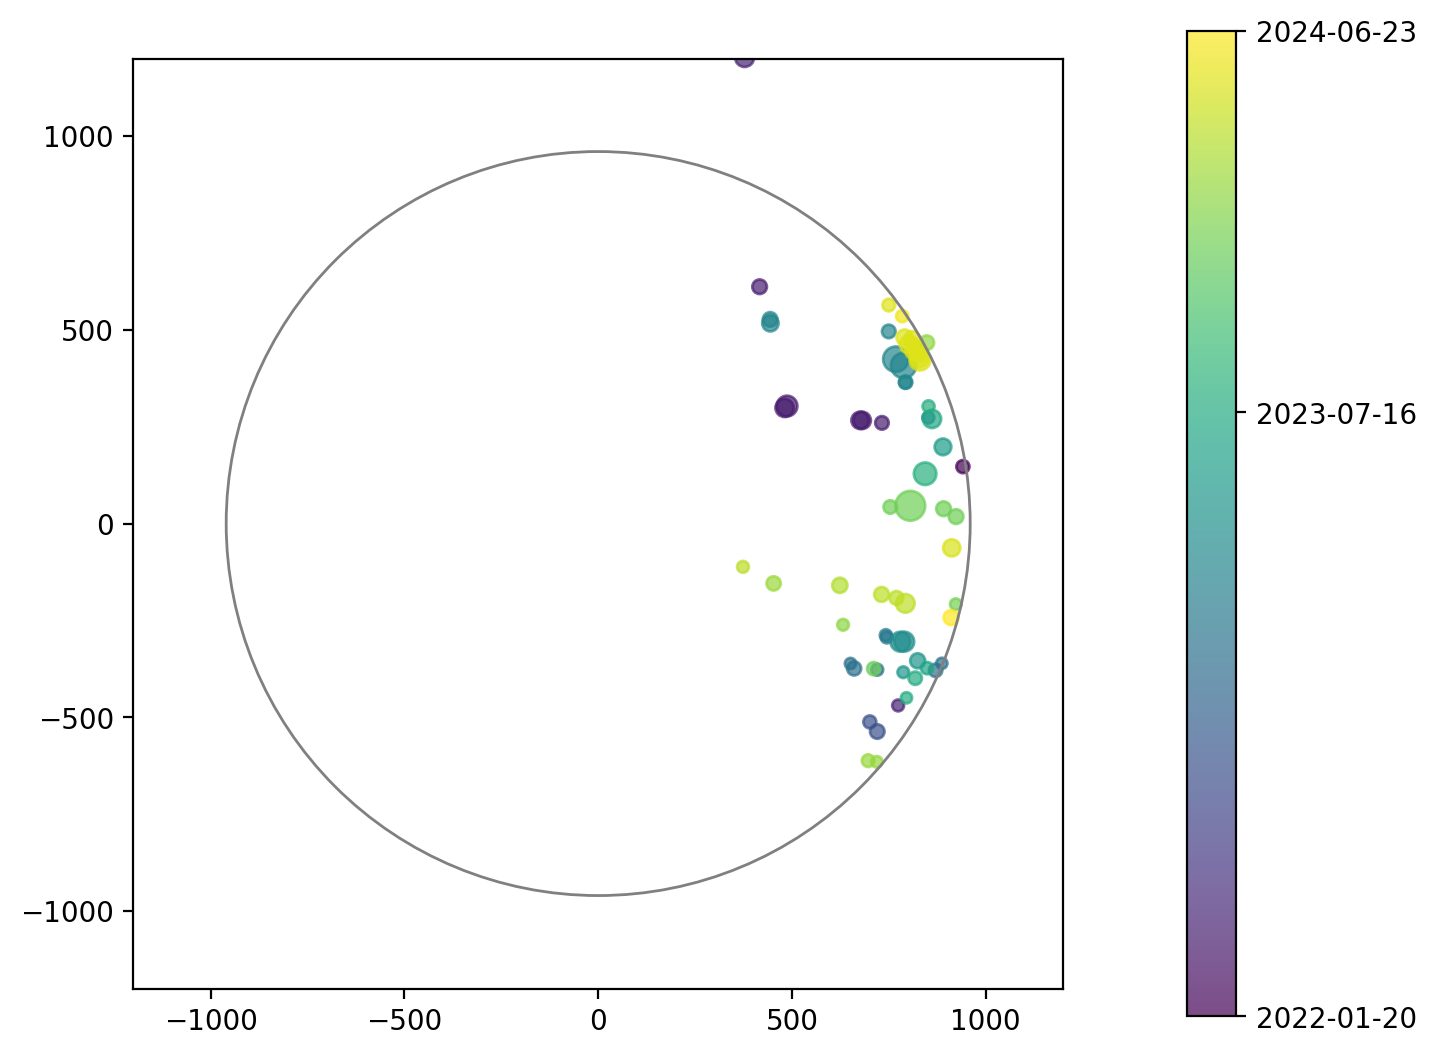

In [39]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)
im = plt.scatter(Connected_flares["hpc_x_earth"], Connected_flares["hpc_y_earth"], sizes, c=ticks, alpha=0.7)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1200, 1200)
ax.set_ylim(-1200, 1200)
circle1 = plt.Circle((0, 0), 960, color='grey', fill=False)
ax.add_artist(circle1)
cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.8)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                        dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                        dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar